# NSC 325 Sweet Spot Identification
Elijah Flores, Aditya Holla, Jayant Bhaskaruni, Beshoy Shaker, and Ameera Aslam

The University of Texas at Austin

In [ ]:
# Import statements
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Read in file
filename = 'sweetspot_UT_Austin.csv'
df = pd.read_csv(filename)

### Data Exploration and Cleaning

In [38]:
# Size and top 8 rows in dataset
print('Data size:', df.shape)
df.head(n=8)

Data size: (55, 14)


,Well Number,Well Name,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,1,PO1_1,5064.04,13746.23,55.191600,1.617450e-04,0.128029,0.020377,0.020377,8551.7,157.119447,3,3491.971374,2992.403113
1,2,PO1_2,7668.40,13746.23,27.529400,1.394790e-04,0.101876,0.015088,0.015088,8579.9,69.831076,4,3501.327981,2947.374808
2,3,PO1_3,2459.67,13746.23,48.354000,1.973990e-04,0.119220,0.022396,0.022396,8557.1,134.781940,4,3493.763065,2904.053641
3,4,PO1_4,10272.76,13746.23,0.572057,1.440000e-07,0.064132,0.000091,0.000091,8635.5,1.101210,5,3519.775759,3301.826052
4,5,PO1_5,12877.11,13746.23,0.430394,8.560000e-08,0.063078,0.000067,0.000067,8718.6,0.435085,5,3547.347889,3365.597401
5,6,PO1_6,10272.76,11141.88,0.995444,3.840000e-07,0.071007,0.000168,0.000168,8555.5,2.792220,5,3493.232193,3196.746890
6,7,PO1_7,11430.25,11141.88,0.215019,6.030030e-01,0.069382,0.000162,0.000162,8589.1,0.523657,5,3504.380491,3126.405930
7,8,PO1_8,12877.11,11141.88,0.000000,1.244600e+00,0.074247,0.000270,0.000270,8638.6,0.000000,5,3520.804323,2949.434450


In [39]:
# Print out the amount of missing values
print((df == 0).sum())
df[(df == 0).any(axis=1)]

Well Number     0
Well Name       0
Bottomhole X    0
Bottomhole Y    0
Co [MSTB]       5
Cw (bbl)        0
POROS           0
KX              0
KY              0
TD(MD)          0
Cg (mmcf)       5
FACIES          0
P_2020-1-6      0
P_2029-1-1      0
dtype: int64


,Well Number,Well Name,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
7,8,PO1_8,12877.11,11141.88,0.0,1.24460,0.074247,0.000270,0.000270,8638.6,0.0,5,3520.804323,2949.434450
8,9,PO1_9,14034.61,11141.88,0.0,1.30679,0.073380,0.000284,0.000284,8684.3,0.0,5,3535.967335,2954.485548
26,27,PO1_27,14034.61,8537.52,0.0,30.15660,0.116111,0.033130,0.010039,8645.4,0.0,4,3523.060526,2676.168143
27,28,PO1_28,14034.61,5933.16,0.0,37.77570,0.112872,0.012573,0.012573,8647.7,0.0,4,3523.823653,2694.598799
46,47,PO1_47,14034.61,3328.80,0.0,87.57740,0.143755,0.038000,0.038000,8691.2,0.0,3,3538.256717,2515.127738


In [40]:
# Well number and name are redundant (can use row index) and can be removed.
df.drop(columns=['Well Number', 'Well Name'], inplace=True)
df.head()

,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,5064.04,13746.23,55.191600,1.617450e-04,0.128029,0.020377,0.020377,8551.7,157.119447,3,3491.971374,2992.403113
1,7668.40,13746.23,27.529400,1.394790e-04,0.101876,0.015088,0.015088,8579.9,69.831076,4,3501.327981,2947.374808
2,2459.67,13746.23,48.354000,1.973990e-04,0.119220,0.022396,0.022396,8557.1,134.781940,4,3493.763065,2904.053641
3,10272.76,13746.23,0.572057,1.440000e-07,0.064132,0.000091,0.000091,8635.5,1.101210,5,3519.775759,3301.826052
4,12877.11,13746.23,0.430394,8.560000e-08,0.063078,0.000067,0.000067,8718.6,0.435085,5,3547.347889,3365.597401


In [41]:
# Rename column headers to be more human-readable
mappings = {
    'Bottomhole X': 'bh_x',         # Bottomhole X-coordinate
    'Bottomhole Y': 'bh_y',         # Bottomhole Y-coordinate
    'Co [MSTB]':'oil_prod_mstb',    # Cumulative oil production, thousand stock tank barrels
    'Cw (bbl)':'water_prod_bbl',    # Cumulative water production, barrels
    'POROS':'porosity',             # Porosity
    'KX':'perm_x',                  # X permeability
    'KY':'perm_y',                  # Y permeability
    'TD(MD)':'total_depth_md',      # Total depth (measured depth)
    'Cg (mmcf)':'gas_prod_mmcf',    # Gas production, million cubic feet
    'FACIES':'facies',              # Facies
    'P_2020-1-6':'past_pressure',   # Pressure on January 6, 2020
    'P_2029-1-1':'future_pressure'  # Predicted pressure on January 1, 2029
}

df.rename(columns=mappings, inplace=True)

In [42]:
# One-hot encode facies since it is categorical
df = pd.get_dummies(df, columns=['facies'], drop_first=True)

# Rearrange columns: well coordinates, production amounts, rock info, and dates
df = df[['bh_x', 'bh_y', 'total_depth_md', 'oil_prod_mstb', 'water_prod_bbl', 'gas_prod_mmcf', 'perm_x', 'perm_y', 'porosity', 'facies_2', 'facies_3', 'facies_4', 'facies_5', 'past_pressure', 'future_pressure']]
df.head()

,bh_x,bh_y,total_depth_md,oil_prod_mstb,water_prod_bbl,gas_prod_mmcf,perm_x,perm_y,porosity,facies_2,facies_3,facies_4,facies_5,past_pressure,future_pressure
0,5064.04,13746.23,8551.7,55.191600,1.617450e-04,157.119447,0.020377,0.020377,0.128029,False,True,False,False,3491.971374,2992.403113
1,7668.40,13746.23,8579.9,27.529400,1.394790e-04,69.831076,0.015088,0.015088,0.101876,False,False,True,False,3501.327981,2947.374808
2,2459.67,13746.23,8557.1,48.354000,1.973990e-04,134.781940,0.022396,0.022396,0.119220,False,False,True,False,3493.763065,2904.053641
3,10272.76,13746.23,8635.5,0.572057,1.440000e-07,1.101210,0.000091,0.000091,0.064132,False,False,False,True,3519.775759,3301.826052
4,12877.11,13746.23,8718.6,0.430394,8.560000e-08,0.435085,0.000067,0.000067,0.063078,False,False,False,True,3547.347889,3365.597401


C:\Users\shake\AppData\Local\Temp\ipykernel_9324\1786411911.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=df.columns)


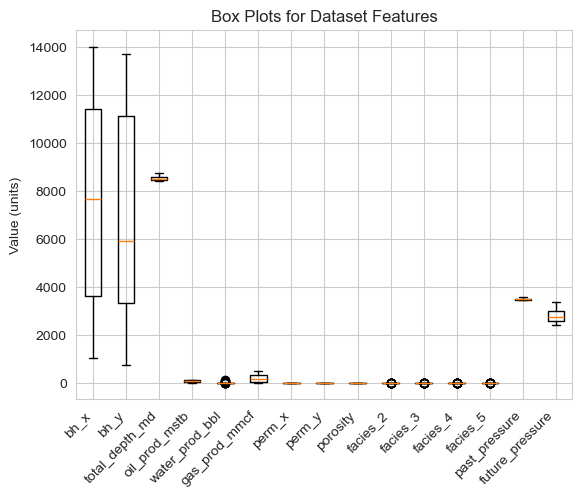

In [43]:
# Boxplots to check for outliers
plt.boxplot(df, labels=df.columns)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value (units)')
plt.title('Box Plots for Dataset Features')
plt.show()

C:\Users\shake\AppData\Local\Temp\ipykernel_9324\700364222.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['water_prod_bbl'], labels=['water_prod_bbl'])


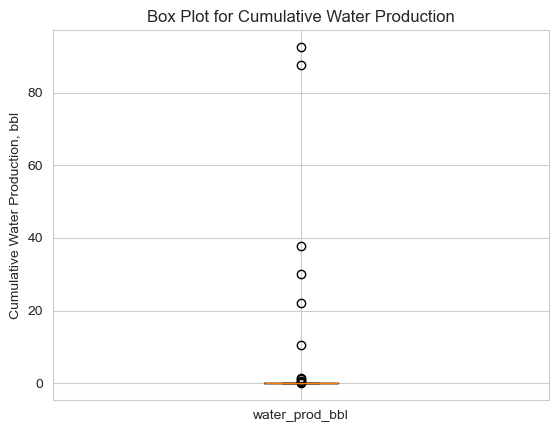

In [44]:
# Water production box plot
plt.boxplot(df['water_prod_bbl'], labels=['water_prod_bbl'])
plt.title('Box Plot for Cumulative Water Production')
plt.ylabel('Cumulative Water Production, bbl')
plt.show()

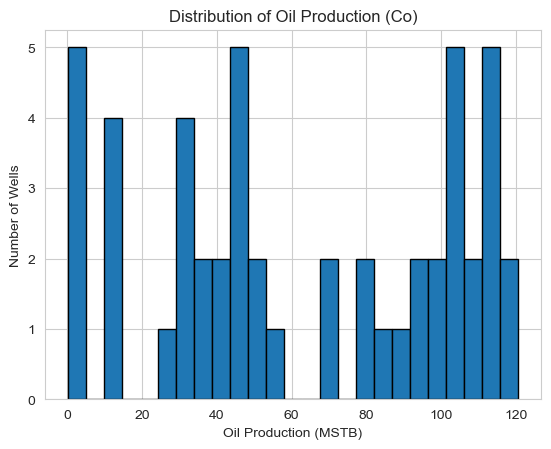

In [45]:
# Treat the 0s as NaN - missing values
temp_df = df['oil_prod_mstb'].replace(0, np.nan).dropna()

# Histogram for oil production
plt.hist(temp_df, bins=25, edgecolor='black')
plt.title('Distribution of Oil Production (Co)')
plt.xlabel('Oil Production (MSTB)')
plt.ylabel('Number of Wells')
plt.show()

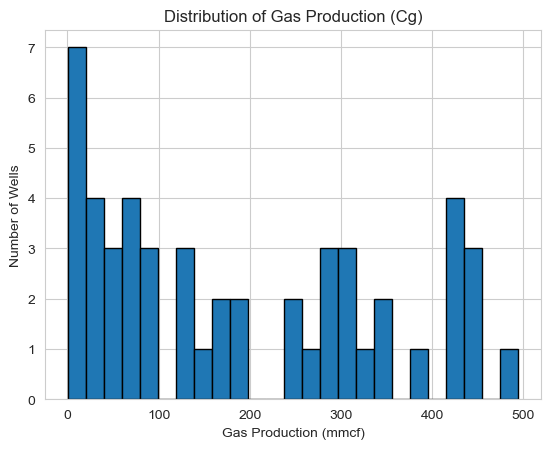

In [46]:
# Treat the 0s as NaN - missing values
temp_df = df['gas_prod_mmcf'].replace(0, np.nan).dropna()

# Histogram for gas production
plt.hist(temp_df, bins=25, edgecolor='black')
plt.title('Distribution of Gas Production (Cg)')
plt.xlabel('Gas Production (mmcf)') 
plt.ylabel('Number of Wells')    
plt.show()

In [47]:
# Missing value imputation

# Replace 0s with NaN 
df['oil_prod_mstb'].replace(0, np.nan, inplace=True)
df['gas_prod_mmcf'].replace(0, np.nan, inplace=True)

# Median imputation (safer than mean due to outliers)
df['oil_prod_mstb'].fillna(df['oil_prod_mstb'].median(), inplace=True)
df['gas_prod_mmcf'].fillna(df['gas_prod_mmcf'].median(), inplace=True)

# Check that there are no more missing values
print(df[['oil_prod_mstb', 'gas_prod_mmcf']].isna().sum())

oil_prod_mstb    0
gas_prod_mmcf    0
dtype: int64


C:\Users\shake\AppData\Local\Temp\ipykernel_9324\4226066532.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oil_prod_mstb'].replace(0, np.nan, inplace=True)
C:\Users\shake\AppData\Local\Temp\ipykernel_9324\4226066532.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

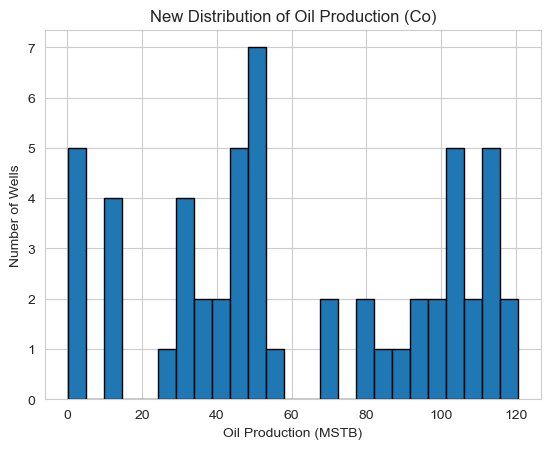

In [48]:
# Histogram for oil production after imputation
plt.hist(df['oil_prod_mstb'], bins=25, edgecolor='black')
plt.title('New Distribution of Oil Production (Co)')
plt.xlabel('Oil Production (MSTB)')
plt.ylabel('Number of Wells')
plt.show()

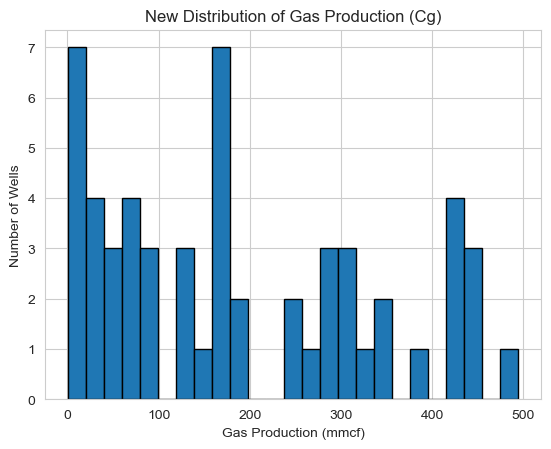

In [49]:
# Histogram for gas production after imputation
plt.hist(df['gas_prod_mmcf'], bins=25, edgecolor='black')
plt.title('New Distribution of Gas Production (Cg)')
plt.xlabel('Gas Production (mmcf)')
plt.ylabel('Number of Wells')
plt.show()

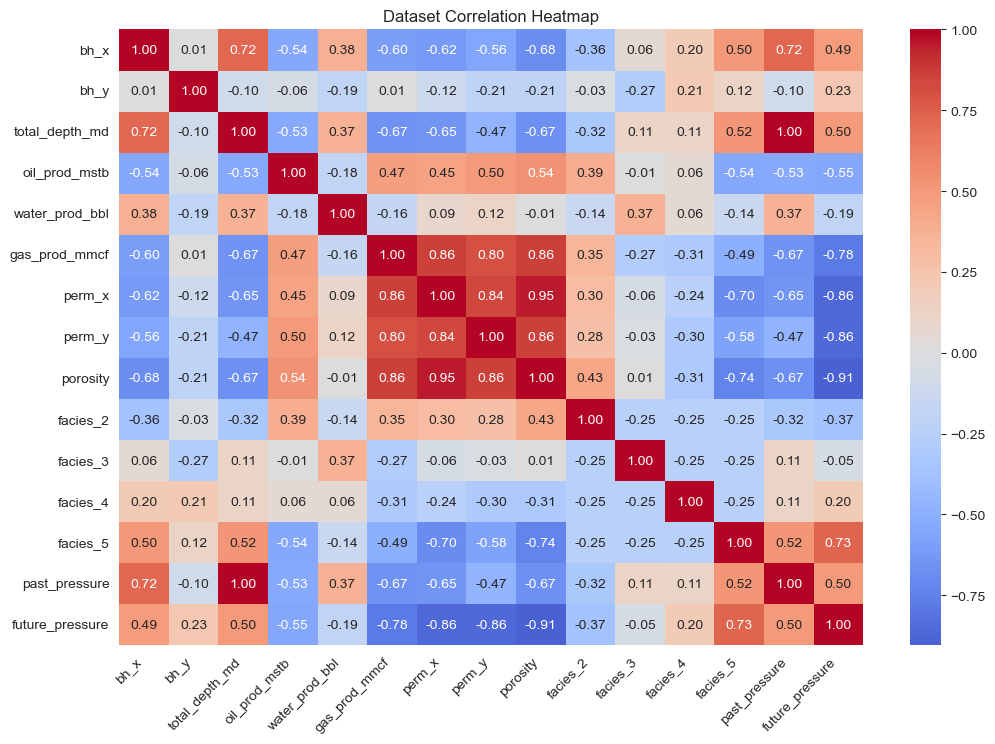

In [50]:
# Heatmap to display correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Dataset Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

### Model Creation

In [51]:
# Define target (Y) and features (X)
X = df.drop(columns=['oil_prod_mstb'])  
y = df['oil_prod_mstb']

# Train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [52]:
# Linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

# Predictions
y_pred_ols = linear.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_ols))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ols)))

# Coefficients ordinary least squares (OLS)
coeffs_ols = pd.Series(linear.coef_, index=X.columns).sort_values()
print("\nTop coefficients (OLS):\n", coeffs_ols.tail(10))

Linear Regression R²: 0.31274248812207295
Linear Regression RMSE: 32.109355271134895

Top coefficients (OLS):
 future_pressure   -1.010413e-01
bh_x              -1.677472e-03
bh_y              -1.882123e-04
gas_prod_mmcf      1.984990e-03
facies_2           1.600848e+01
facies_3           1.661414e+01
facies_5           2.045593e+01
facies_4           2.731511e+01
perm_y             8.887311e+02
past_pressure      1.469837e+07
dtype: float64


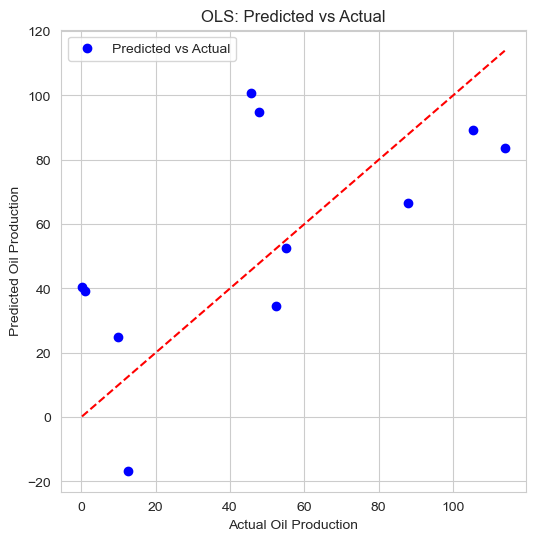

In [53]:
# Visualize predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Oil Production')
plt.ylabel('Predicted Oil Production')
plt.title('OLS: Predicted vs Actual')
plt.legend()
plt.show()

# Linear model not capturing relationship well - dots far off


In [54]:
# # Ridge with cross-validation to pick best alpha
# alphas = np.logspace(-3, 3, 13)  # 0.001 to 1000

# ridge_cv = Pipeline([
#     ('scaler', StandardScaler()),  # scale features so Ridge is fair
#     ('ridge', RidgeCV(alphas=alphas))
# ])

# ridge_cv.fit(X_train, y_train)
# y_pred_ridge = ridge_cv.predict(X_test)

# print("Ridge Best alpha:", ridge_cv.named_steps['ridge'].alpha_)
# print("Ridge R²:", round(r2_score(y_test, y_pred_ridge), 4))
# print("Ridge RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 4))

# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel('Actual Oil Production')
# plt.ylabel('Predicted Oil Production')
# plt.title('Ridge: Predicted vs Actual')
# plt.legend()
# plt.show()

# lasso_cv = Pipeline([
#     ('scaler', StandardScaler()),
#     ('lasso', LassoCV(cv=5, max_iter=5000))
# ])

# lasso_cv.fit(X_train, y_train)
# y_pred_lasso = lasso_cv.predict(X_test)

# print("Lasso Best alpha:", lasso_cv.named_steps['lasso'].alpha_)
# print("Lasso R²:", round(r2_score(y_test, y_pred_lasso), 4))
# print("Lasso RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))

# # Which features Lasso kept
# coeffs_lasso = pd.Series(lasso_cv.named_steps['lasso'].coef_, index=X.columns)
# print("\nLasso coefficients:\n", coeffs_lasso[coeffs_lasso != 0])




# coef_df = pd.DataFrame({
#     'OLS': ols.coef_,
#     'Ridge': ridge_cv.named_steps['ridge'].coef_,
#     'Lasso': lasso_cv.named_steps['lasso'].coef_
# }, index=X.columns).sort_values(by='OLS')

# coef_df.plot(kind='barh', figsize=(8,10))
# plt.title('Coefficients: OLS vs Ridge vs Lasso')
# plt.xlabel('Coefficient value')
# plt.tight_layout()
# plt.show()




In [55]:
# # porosity vs oil production (prediction feature vs target variable)
# x = df['porosity']
# y = df['oil_prod_mstb']

# slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# print("Slope:", slope)
# print("Intercept:", intercept)
# print("R²:", r_value**2)
# print("p-value:", p_value)
# print("Std Err:", std_err)

In [56]:
# plt.scatter(x, y)
# plt.plot(x, slope * x + intercept, color="red", label="Line of Best Fit")
# plt.xlabel("Porosity")
# plt.ylabel("Oil Production (MSTB)")
# plt.title("Linear Regression (porosity vs oil production)")
# plt.legend()
# plt.show()


c:\Users\shake\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model R²: 0.936 | RMSE: 42.219


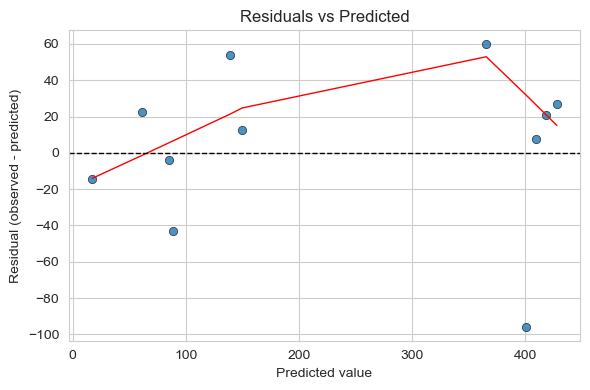

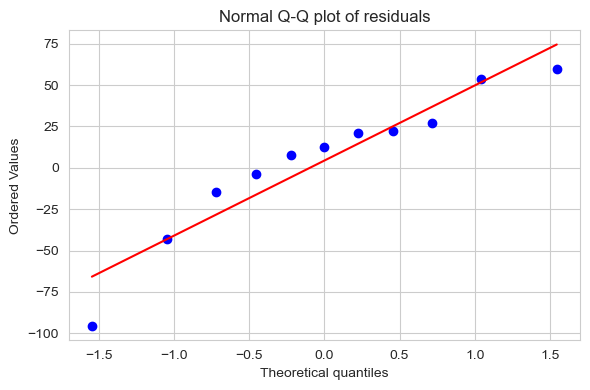

In [57]:
#Compute residuals
# Drop target column only
target = 'gas_prod_mmcf'
X = df.drop(columns=[target])
y = df[target]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest
model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test.values - y_pred
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Model R²: {r2:.3f} | RMSE: {rmse:.3f}")

#3) Plot diagnostics
sns.set_style("whitegrid")

#Residuals vs Predicted with LOWESS smoothing
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, edgecolor="k", alpha=0.8)
sns.regplot(x=y_pred, y=residuals, lowess=True, scatter=False, line_kws={"color":"red", "lw":1})
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Predicted value")
plt.ylabel("Residual (observed - predicted)")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

#Normal Q-Q plot (probability plot)
plt.figure(figsize=(6,4))
st.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot of residuals")
plt.tight_layout()
plt.show()

c:\Users\shake\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model R²: 0.618 | RMSE: 21.617


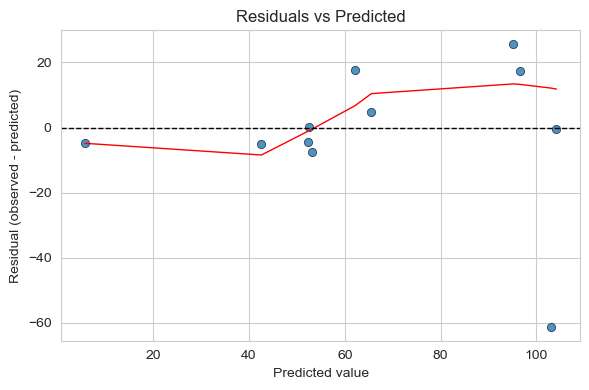

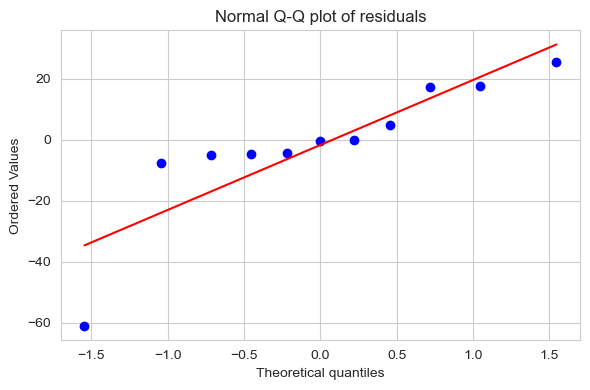

In [58]:
#Compute residuals
# Drop target column only
target = 'oil_prod_mstb'
X = df.drop(columns=[target])
y = df[target]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest
model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test.values - y_pred
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Model R²: {r2:.3f} | RMSE: {rmse:.3f}")

#3) Plot diagnostics
sns.set_style("whitegrid")

#Residuals vs Predicted with LOWESS smoothing
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, edgecolor="k", alpha=0.8)
sns.regplot(x=y_pred, y=residuals, lowess=True, scatter=False, line_kws={"color":"red", "lw":1})
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Predicted value")
plt.ylabel("Residual (observed - predicted)")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

#Normal Q-Q plot (probability plot)
plt.figure(figsize=(6,4))
st.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot of residuals")
plt.tight_layout()
plt.show()


R²: 0.6177147185580755
RMSE: 21.616974299473785


c:\Users\shake\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


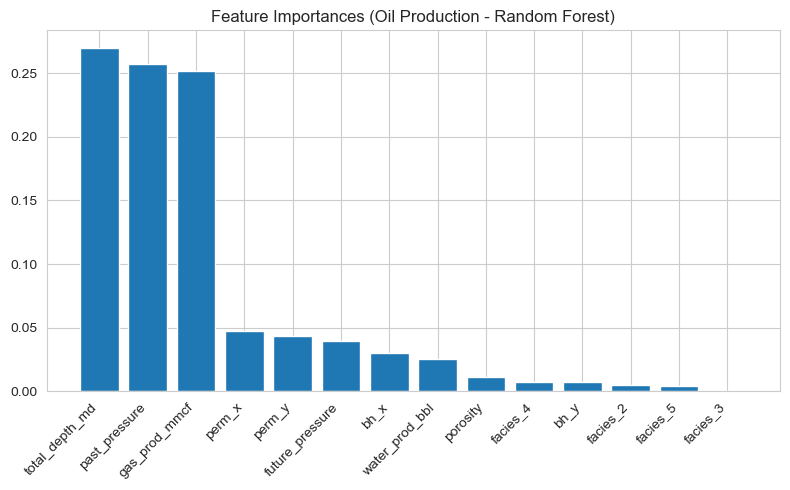

R²: 0.9362283090026723
RMSE: 42.21931835855995


c:\Users\shake\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


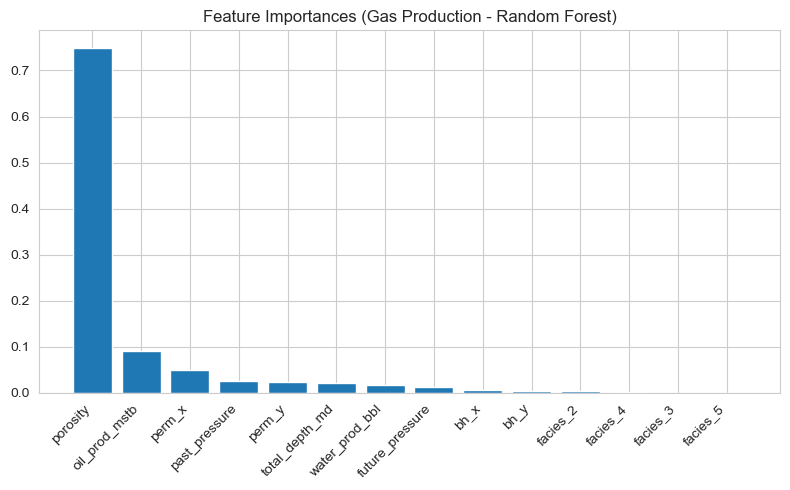

In [59]:
target = "oil_prod_mstb" 

# Drop target column only
X = df.drop(columns=[target])
y = df[target]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest
model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42
)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluation
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

#Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.title("Feature Importances (Oil Production - Random Forest)")
plt.tight_layout()
plt.show()
# For gas production (mmcf)
target = "gas_prod_mmcf" 

# Drop target column only
X = df.drop(columns=[target])
y = df[target]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest
model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42
)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluation
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

#Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.title("Feature Importances (Gas Production - Random Forest)")
plt.tight_layout()
plt.show()

In [60]:
#OLS Summary for oil production
X = df[["porosity", "gas_prod_mmcf", "bh_y", "bh_x", "facies_2", "facies_3", "facies_4", "facies_5", "past_pressure", "water_prod_bbl"]]
y = df["oil_prod_mstb"]
X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \
    X[["facies_2", "facies_3", "facies_4", "facies_5"]].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

C:\Users\shake\AppData\Local\Temp\ipykernel_9324\2143881299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \


                            OLS Regression Results                            
Dep. Variable:          oil_prod_mstb   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     5.208
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           5.19e-05
Time:                        23:40:13   Log-Likelihood:                -256.00
No. Observations:                  55   AIC:                             534.0
Df Residuals:                      44   BIC:                             556.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -39.2359    877.375     -0.

In [61]:
print(model.pvalues)

const             0.964533
porosity          0.123977
gas_prod_mmcf     0.078183
bh_y              0.732921
bh_x              0.276667
facies_2          0.001895
facies_3          0.007557
facies_4          0.006261
facies_5          0.051354
past_pressure     0.902864
water_prod_bbl    0.190871
dtype: float64


In [62]:
#OLS Summary for oil production after removing high p-value features
X = df[["porosity", "gas_prod_mmcf", "facies_2", "facies_3", "facies_4", "facies_5", "water_prod_bbl"]]
y = df["oil_prod_mstb"]
X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \
    X[["facies_2", "facies_3", "facies_4", "facies_5"]].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          oil_prod_mstb   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     7.485
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           4.84e-06
Time:                        23:40:13   Log-Likelihood:                -256.88
No. Observations:                  55   AIC:                             529.8
Df Residuals:                      47   BIC:                             545.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -193.4932     89.025     -2.

C:\Users\shake\AppData\Local\Temp\ipykernel_9324\3662757295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \


In [63]:
print(model.pvalues)

const             0.034817
porosity          0.025653
gas_prod_mmcf     0.072253
facies_2          0.000976
facies_3          0.002925
facies_4          0.002708
facies_5          0.029728
water_prod_bbl    0.017212
dtype: float64


In [64]:
X = df[["porosity", "oil_prod_mstb", "bh_y", "bh_x", "facies_2", "facies_3", "facies_4", "facies_5", "past_pressure", "water_prod_bbl"]]
y = df["gas_prod_mmcf"]
X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \
    X[["facies_2", "facies_3", "facies_4", "facies_5"]].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          gas_prod_mmcf   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     34.54
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.39e-17
Time:                        23:40:13   Log-Likelihood:                -293.00
No. Observations:                  55   AIC:                             608.0
Df Residuals:                      44   BIC:                             630.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1845.8185   1696.477      1.

C:\Users\shake\AppData\Local\Temp\ipykernel_9324\447661456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["facies_2", "facies_3", "facies_4", "facies_5"]] = \


In [65]:
print(model.pvalues)

const             0.282506
porosity          0.115474
oil_prod_mstb     0.078183
bh_y              0.062242
bh_x              0.255042
facies_2          0.003512
facies_3          0.002420
facies_4          0.035971
facies_5          0.207628
past_pressure     0.259347
water_prod_bbl    0.850125
dtype: float64


In [66]:
X = df[["porosity", "oil_prod_mstb", "bh_y", "bh_x", "facies_2", "facies_3", "facies_4"]]
y = df["gas_prod_mmcf"]
X[["facies_2", "facies_3", "facies_4"]] = \
    X[["facies_2", "facies_3", "facies_4"]].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          gas_prod_mmcf   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     49.00
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.79e-19
Time:                        23:40:13   Log-Likelihood:                -294.77
No. Observations:                  55   AIC:                             605.5
Df Residuals:                      47   BIC:                             621.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -291.9584     60.019     -4.864

C:\Users\shake\AppData\Local\Temp\ipykernel_9324\2081002452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["facies_2", "facies_3", "facies_4"]] = \


In [67]:
print(model.pvalues)

const            1.328494e-05
porosity         6.428387e-15
oil_prod_mstb    8.572070e-02
bh_y             9.367896e-03
bh_x             4.378714e-01
facies_2         3.899326e-03
facies_3         3.290122e-07
facies_4         1.156148e-03
dtype: float64


Summary Statistics:

                        mean          50%          std           min  \
bh_x             7589.476364  7668.400000  4156.444078  1.012810e+03   
bh_y             7116.958000  5933.160000  3940.735399  7.244300e+02   
total_depth_md   8539.674545  8519.000000    83.861334  8.429100e+03   
oil_prod_mstb      61.929930    52.504300    37.913359  4.644580e-02   
water_prod_bbl      5.165370     0.000300    18.109040  8.560000e-08   
gas_prod_mmcf     188.803059   162.333925   149.560601  8.435022e-02   
perm_x              0.027481     0.027701     0.018500  6.680000e-05   
perm_y              0.022876     0.016377     0.018372  6.680000e-05   
porosity            0.135532     0.135415     0.039870  6.307772e-02   
past_pressure    3487.981393  3481.121691    27.824736  3.451293e+03   
future_pressure  2790.943485  2746.230378   259.330503  2.422838e+03   

                          max  
bh_x             14034.610000  
bh_y             13746.230000  
total_depth_md    

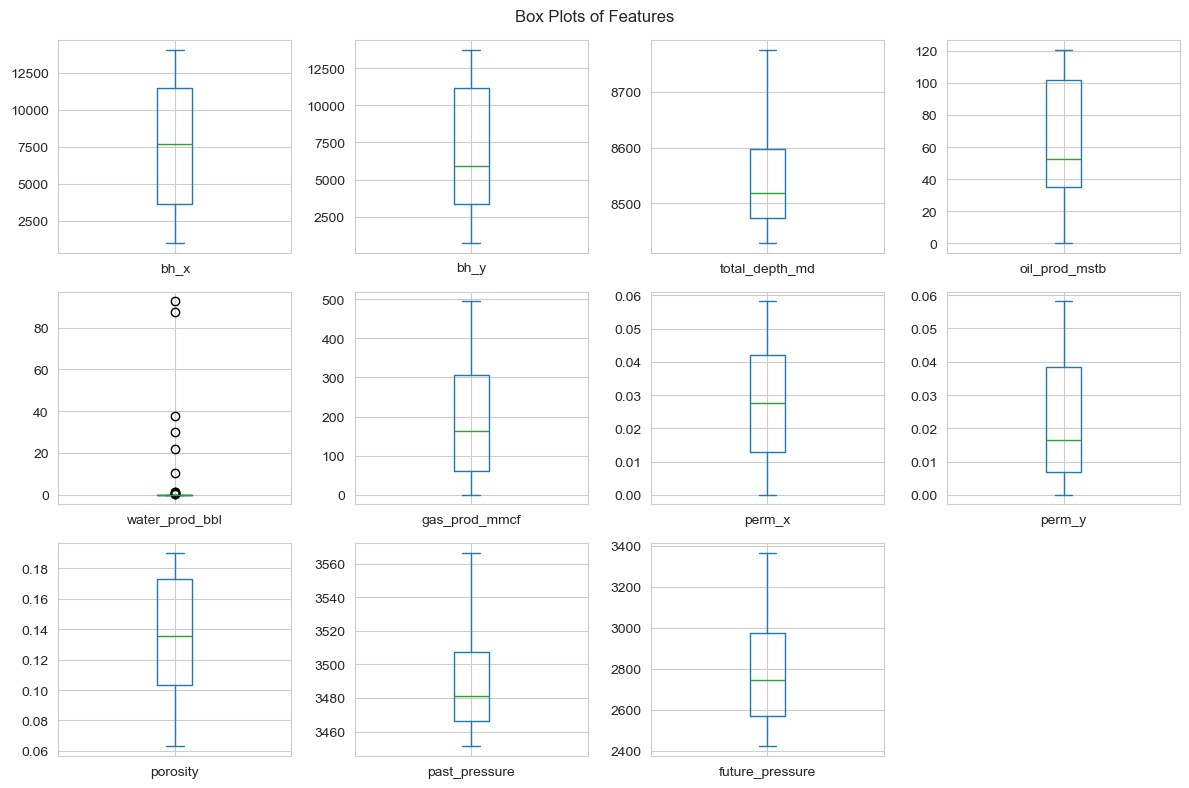

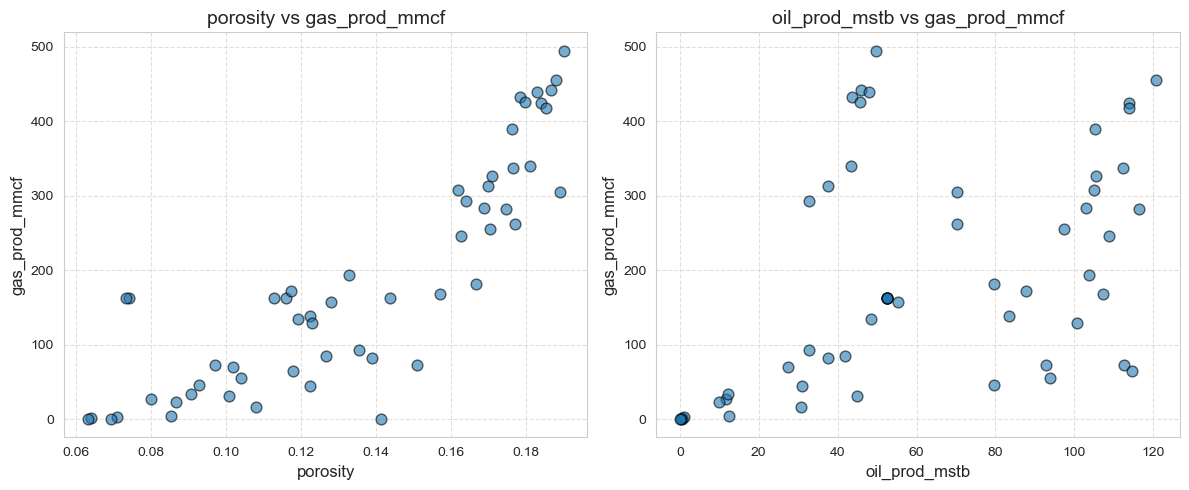

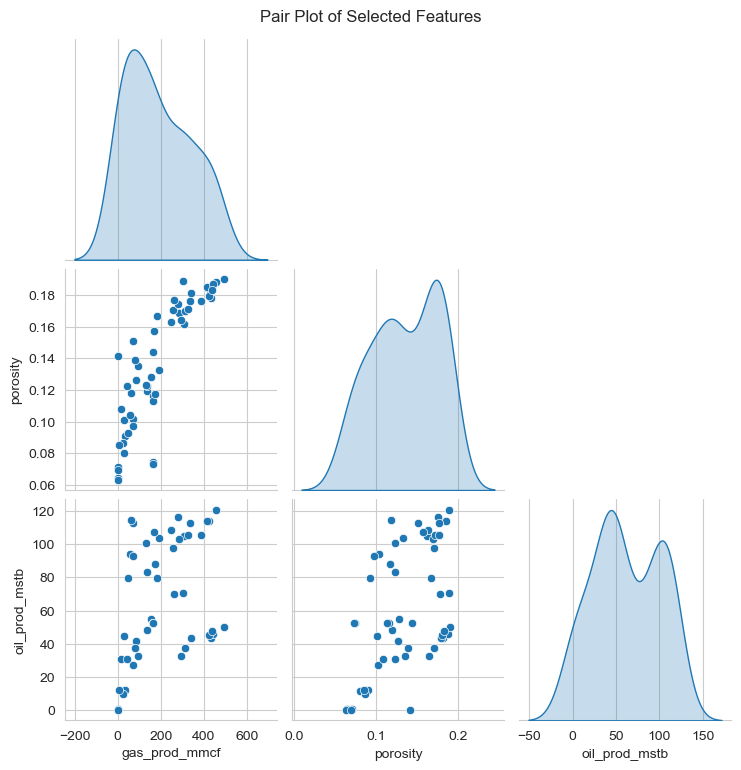

In [68]:
#Summary statistics
print("Summary Statistics:\n")
print(df.describe().T[["mean", "50%", "std", "min", "max"]])

# Box plots for each numeric feature
df.plot(kind="box", subplots=True, layout=(3, 4), figsize=(12, 8), sharex=False, sharey=False)
plt.suptitle("Box Plots of Features")
plt.tight_layout()
plt.show()

# Target and features
target = "gas_prod_mmcf"
numeric_features = ["porosity", "oil_prod_mstb"]

# Scatter plots
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    plt.scatter(df[col], df[target], alpha=0.6, edgecolor="k", s=60)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.title(f"{col} vs {target}", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


#Pair plot for selected features
selected_features = [target, "porosity", "oil_prod_mstb"] 
sns.pairplot(df[selected_features], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()